## 컨볼루션 신경망 (CNN
- 이미지 데이터를 다루는 컴퓨터 비전 분야에서 매우 활발하게 사용됨
  - 텍스트 시계열 데이터 등에서도 월등한 성능을 보여줌
  - 그렇지만 가장 빛나는 분야는 이미지 데이터를 다룰때라고 할 수 있다.


## 일단 해보기

In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 데이터를 다운 받습니다.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28) (10000, 28, 28)


In [5]:
# 피쳐 스케일링
# 0~1 범위로 만듭니다.
x_train = np.reshape(x_train / 255, (-1,28,28,1)) # (-1 전부, 가로 28, 세로 28, 흑백 1 *RGB 컬러이미지일경우 3)
x_test = np.reshape(x_test / 255, (-1,28,28,1)) 

In [6]:
print(f'x_train.shape: {x_train.shape}, x_test.shape{x_test.shape}')

x_train.shape: (60000, 28, 28, 1), x_test.shape(10000, 28, 28, 1)


In [7]:
# 타겟 레이블링
# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(f'y_train.shape: {y_train.shape}, y_test.shape{y_test.shape}')

y_train.shape: (60000, 10), y_test.shape(10000, 10)


In [9]:
# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size= 0.3,random_state=777)

In [10]:
print(f'x_train.shape: {x_train.shape}, x_test.shape{x_test.shape}, {x_val.shape}')
print(f'y_train.shape: {y_train.shape}, y_test.shape{y_test.shape}, {y_val.shape}')

x_train.shape: (42000, 28, 28, 1), x_test.shape(10000, 28, 28, 1), (18000, 28, 28, 1)
y_train.shape: (42000, 10), y_test.shape(10000, 10), (18000, 10)


## 모델 구성하기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

# 이전과 다르게 리스트 형태로 층을 구성
model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시
    Conv2D(filters = 16, kernel_size = 3, strides = (1,1),
           padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'),
    Conv2D(filters = 32, kernel_size = 3, strides = (1,1),
           padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'),
    Conv2D(filters = 64, kernel_size = 3, strides = (1,1),
           padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size =(2,2), strides = 2, padding = 'same'),
    Flatten(), # Dense에 넣기 전 데이터 펼쳐주기
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10개의 출력을 가지는 신경망

])

In [12]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train,  y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1313/1313 [==============================] - 11s 6ms/step - loss: 0.5338 - acc: 0.8044 - val_loss: 0.3806 - val_acc: 0.8666
Epoch 2/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3432 - acc: 0.8750 - val_loss: 0.3265 - val_acc: 0.8804
Epoch 3/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2901 - acc: 0.8931 - val_loss: 0.2993 - val_acc: 0.8952
Epoch 4/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2595 - acc: 0.9038 - val_loss: 0.2821 - val_acc: 0.8966
Epoch 5/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2363 - acc: 0.9128 - val_loss: 0.2488 - val_acc: 0.9088
Epoch 6/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2151 - acc: 0.9201 - val_loss: 0.2583 - val_acc: 0.9084
Epoch 7/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1989 - acc: 0.9266 - val_loss: 0.2306 - val_acc: 0.9168
Epoch 8/30
1313/1313 [==============================] - 8s 6m

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

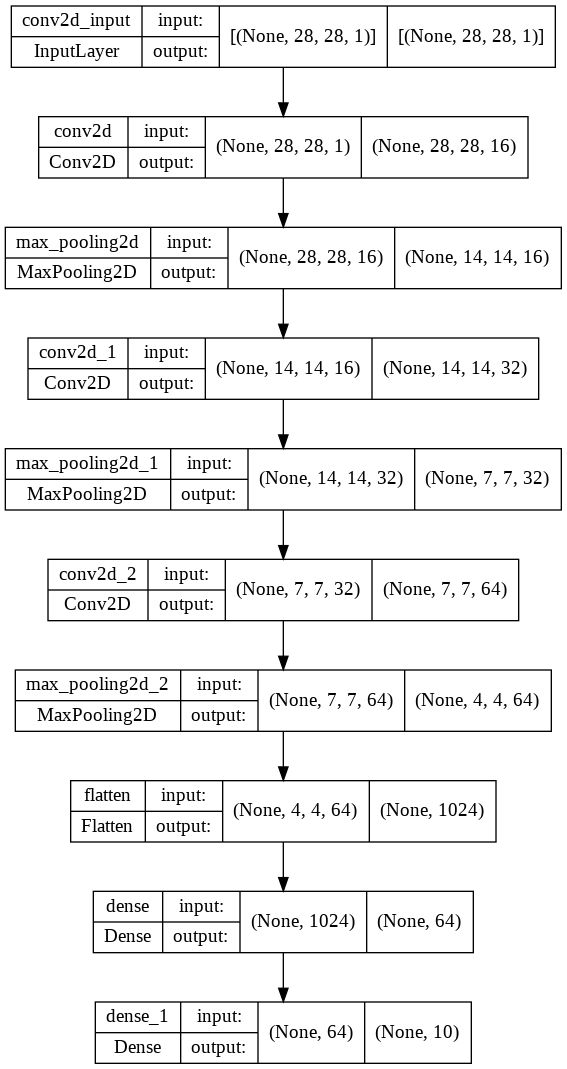

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes =True)

In [16]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5505 - acc: 0.9085


[0.5504859685897827, 0.9085000157356262]

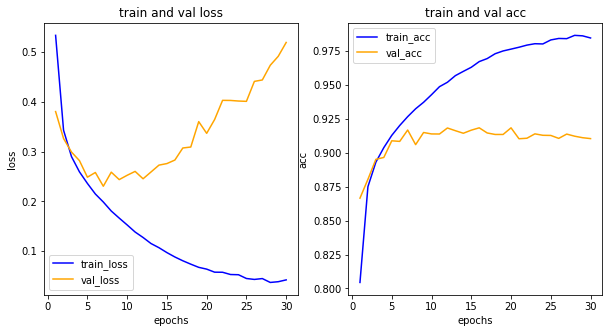

In [17]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

결과 비교를 통해 Fashion-MNIST 데ㅣ어셋에서는 컨볼루션 신경망으로 높은 성능을 얻기가 수월함
- 주의 컨불로션 신경망의 성능을 맹신하지말자